In [ ]:
from adversarial_utils import *

# Importing data

In [ ]:
train_images,y_train,train_labels,test_images,y_test,test_labels = load_CIFAR10_data()

In [ ]:
train_images.shape

(50000, 32, 32, 3)

In [ ]:
test_labels.shape

(10000, 10)

# Defining a model for cifar classification

In [ ]:
## classification model for cifar10
def build_model_CNN(input_shape,optimizer):
  input = Input(shape=input_shape)
  weight_decay = 1e-2
  model = Sequential()

  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer= regularizers.l2(weight_decay), padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2),padding='same'))
  model.add(Dropout(0.15))
  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer= regularizers.l2(weight_decay), padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2),padding='same'))
  model.add(Dropout(0.3))

  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', kernel_regularizer= regularizers.l2(weight_decay), padding='same'))
  model.add(BatchNormalization())
  model.add(Dropout(0.3))
  model.add(MaxPooling2D((2, 2),padding='same'))
  
  model.add(AveragePooling2D((2, 2),padding='same'))
  model.add(Dropout(0.15))
  model.add(Flatten())
  model.add(Dense(64, activation='relu', kernel_initializer='he_uniform', kernel_regularizer= regularizers.l2(weight_decay)))
  model.add(Dropout(0.15))
  model.add(Dense(10, activation='softmax'))
  # compile model
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
# hyperparameter
opt = optimizers.RMSprop(lr=0.0001,decay=1e-4)
batch_size = 128


#model fitting
model = build_model_CNN(train_images.shape[1:],optimizer=opt)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=0,patience=50)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

history = model.fit(train_images, train_labels, epochs=100, batch_size=128,verbose=1,validation_data=(test_images,test_labels), callbacks=[es,mc])

Epoch 1/100
386/391 [============================>.] - ETA: 0s - loss: 8.3738 - accuracy: 0.2842
Epoch 00001: val_accuracy improved from -inf to 0.29290, saving model to best_model.h5
391/391 [==============================] - 5s 12ms/step - loss: 8.3620 - accuracy: 0.2847 - val_loss: 7.4620 - val_accuracy: 0.2929
Epoch 2/100
387/391 [============================>.] - ETA: 0s - loss: 6.5830 - accuracy: 0.3945
Epoch 00002: val_accuracy improved from 0.29290 to 0.45640, saving model to best_model.h5
391/391 [==============================] - 4s 11ms/step - loss: 6.5771 - accuracy: 0.3948 - val_loss: 5.8214 - val_accuracy: 0.4564
Epoch 3/100
388/391 [============================>.] - ETA: 0s - loss: 5.4245 - accuracy: 0.4446
Epoch 00003: val_accuracy improved from 0.45640 to 0.50970, saving model to best_model.h5
391/391 [==============================] - 4s 11ms/step - loss: 5.4221 - accuracy: 0.4446 - val_loss: 4.8756 - val_accuracy: 0.5097
Epoch 4/100
388/391 [=========================

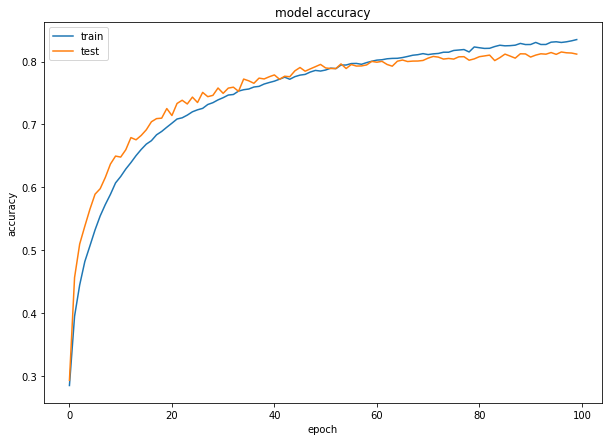

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

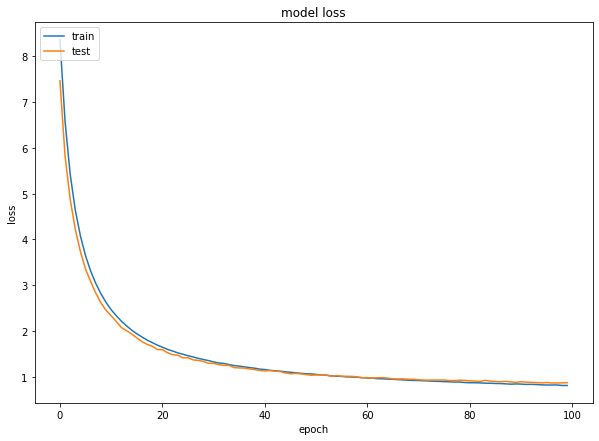

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [9]:
saved_model = load_model('./cifar10.h5')
score = saved_model.evaluate(train_images, y_train, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1],"\n")
score = saved_model.evaluate(test_images, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train loss: 0.6319649815559387
Train accuracy: 0.9106199741363525 

Test loss: 0.867785632610321
Test accuracy: 0.8151999711990356


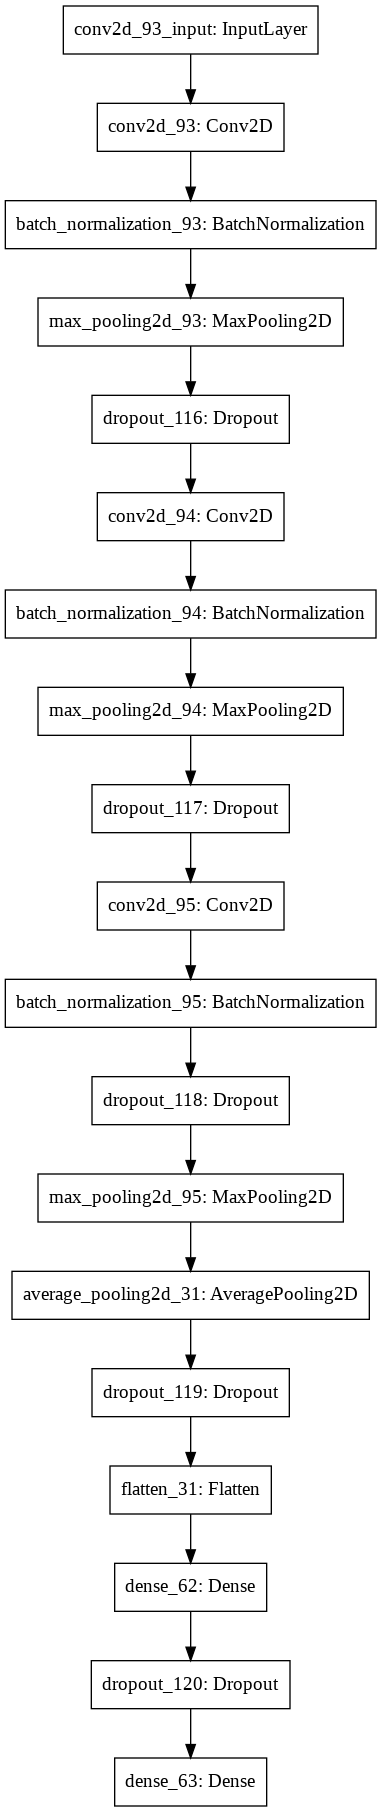

In [ ]:
keras.utils.plot_model(model,'my_first_model.png')

Limite : 8/256
data augmentation torch.transform 
30 ou 40 epoch : réduire le learning rate
